Source repository for `noise` and `ps_course/probability`: https://github.com/skkaul/randomness

In [10]:
# Getting Python ready
from scipy.stats import norm
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np
#from ipynb.fs.full.Bernoulli import aBernoulliExperiment
import math
import textwrap

Q1 (Bernoulli) We will model a coin that gives heads with probability $0.2$ as a Bernoulli $(0.2)$ RV. 

In [11]:
def aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0]):
    
    repeatIndex = 0
    observation = np.ones((numRepeatsOfExp, numTrialsInAnExp))
    #print(observation)

    observation = randomNumGen.random((numRepeatsOfExp, numTrialsInAnExp))

    index_ge1 = np.less_equal(observation, bernoulliParam_p)
    
    observation[index_ge1] = profitLoss[0]
    observation[np.invert(index_ge1)] = profitLoss[1]


    # while (repeatIndex < numRepeatsOfExp):
    #     observation[repeatIndex,:] = randomNumGen.random((1, numTrialsInAnExp))
    #     #index_ge1 = np.greater_equal(observation[repeatIndex,:], bernoulliParam_p)
    #     index_ge1 = np.less_equal(observation[repeatIndex,:], bernoulliParam_p)
        
    #     #print(observation[repeatIndex,:])
    #     #print(index_ge1)

    #     observation[repeatIndex,index_ge1] = profitLoss[0]
    #     observation[repeatIndex, np.invert(index_ge1)] = profitLoss[1]

    #     #print(observation[repeatIndex,:])

    #     #print(np.sum(observation[repeatIndex,:])/numTrialsInAnExp)
    #     repeatIndex = repeatIndex + 1
    return observation

1-a Toss the coin $20$ times. Plot the outcomes against the trial number. You must label the plot appropriately. Explain what you observe in the plot.

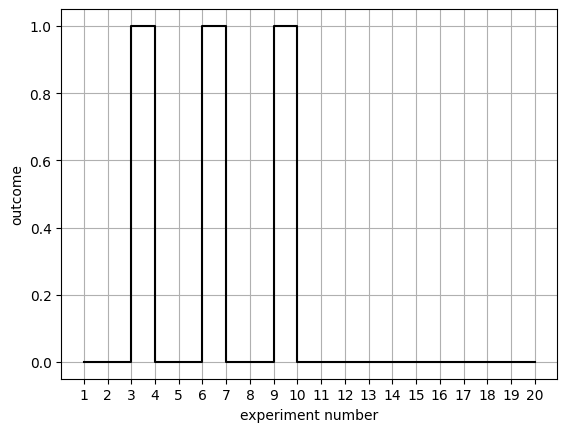

In [12]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 1
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])
#print(observation)

indices = [x for x in range(1,21)]
npind = np.array(indices)
npobs = np.array(observation[0])

plt.step(npind, npobs, 'black', where = 'pre')
plt.xticks(npind)
plt.grid(True)
plt.xlabel("experiment number")
plt.ylabel("outcome")
plt.show()

Explanation: this plot shows the outcome corresponding to 20 trials in the experiment

1-b Now repeat the above 5 times. Plot the outcomes for each repeat against the trial number, all on the same figure. You must label the plot appropriately. Explain what you observe in the plot.

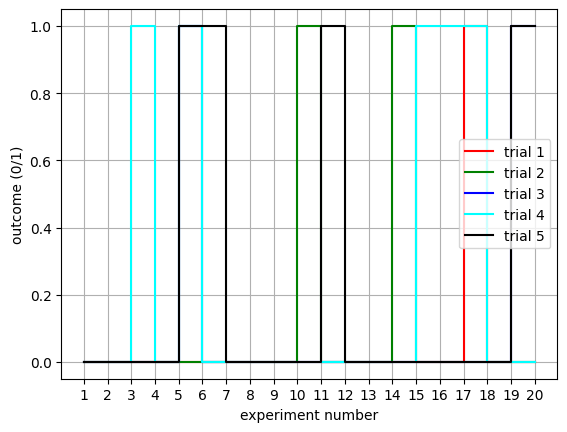

In [13]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 5
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])
#print(observation)

color = ['red', 'green', 'blue', 'cyan', 'black']
indices = [x for x in range(1,21)]
npind = np.array(indices)
for i in range(5):
    npobs = np.array(observation[i])
    plt.step(npind, npobs, color[i], where = 'pre', label = 'trial '+str(i+1))

plt.xticks(npind)
plt.grid(True)
plt.xlabel("experiment number")
plt.ylabel("outcome (0/1)")
plt.legend(loc='right')
plt.show()

Explanation: this plot shows the outcome corresponding to 20 trial in five experiments and each experiment is represented by a different colour plot

1-c Repeat (a) $100$ times. You will end up with $100$ sequences each of length $20$. Store them in an appropriate array. For each sequence, calculate the total number of $1$ (s) and plot their histogram (with frequency of occurance on the y-axis). Which PMF does the histogram approximate?

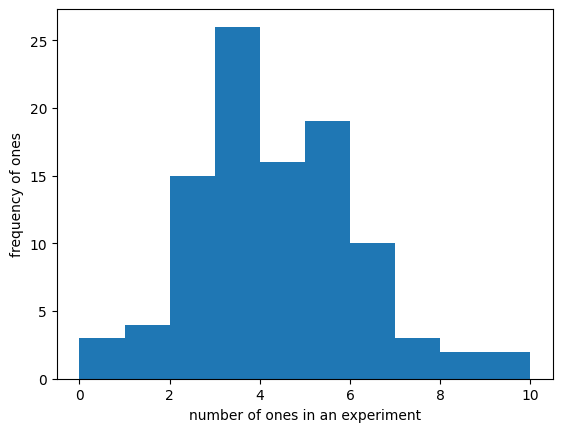

In [14]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 100
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])
#print(observation)

ora=[]
for i in observation:
    ora.append(np.count_nonzero(i == 1))
plt.hist(ora)
plt.xlabel("number of ones in an experiment")
plt.ylabel("frequency of ones")
plt.show()

Explanation: this is a histogram which plots the number of successes in each of the 20 trials in 100 experiments

1-d Starting with the array you obtained in (c), choose all those sequences that sum to at least $3$. For each such sequence, calculate the total number of $1$ (s) and plot their histogram (with frequency of occurance on the y-axis). Which PMF does the histogram approximate?

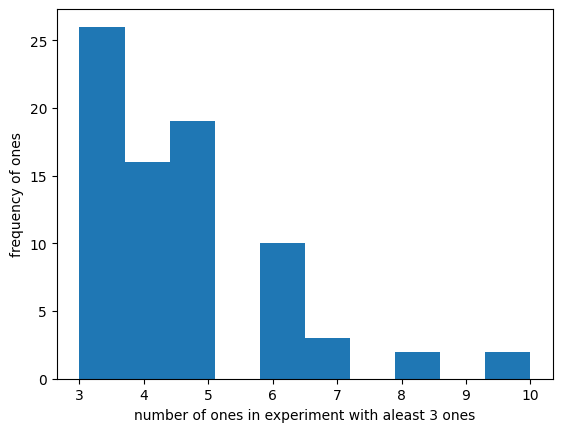

In [15]:
#code block for 1-c needs to be executed for this code block to execute
ora3=[]
for i in range(100):
    if ora[i]>=3:
        ora3.append(ora[i])
plt.hist(ora3)
plt.xlabel("number of ones in experiment with aleast 3 ones")
plt.ylabel("frequency of ones")
plt.show()

Explanation: this is a histogram which plots the number of successes in each of the 20 trials in 100 experiments where successess are more than 2

---

Q2 Pick four values of $\alpha$ uniformly and randomly from the interval $(0, 100)$. For each $\alpha$, simulate a Binomial $(n,p)$, with $n$ chosen for the $\alpha$ to be as small as possible while providing a reasonable approximation (the PMFs/ histograms look visually similar) of the Poisson $(\alpha)$. Note that you must also simulate the Poisson RVs. Choose the number of experiements for all the RVs to be large enough to ensure that the resulting histograms are good approximations of the PMFs.

In [16]:
def aBinomialExperiment(randomNumGen, binomialParam_n=5, binomialParam_p=0.5, numberOfBinomialExperiments = 1, profitLoss_Bern = [1,0]):
    
    outcomesOfBernTrails = aBernoulliExperiment(randomNumGen, bernoulliParam_p=binomialParam_p, numRepeatsOfExp = numberOfBinomialExperiments, numTrialsInAnExp = binomialParam_n, profitLoss = profitLoss_Bern)

    #print(outcomesOfBernTrails, outcomesOfBernTrails.shape)

    outcomeOfBinomialExp = np.sum(outcomesOfBernTrails, axis = 1)#.reshape((numberOfBinomialExperiments,1)) #get a column vector

    #print(outcomeOfBinomialExp, outcomeOfBinomialExp.shape)

    return outcomeOfBinomialExp

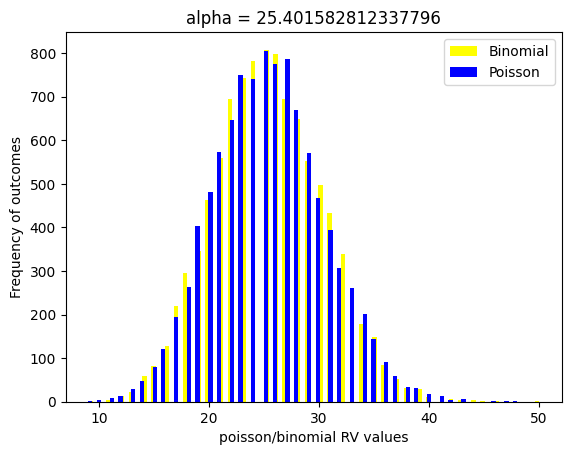

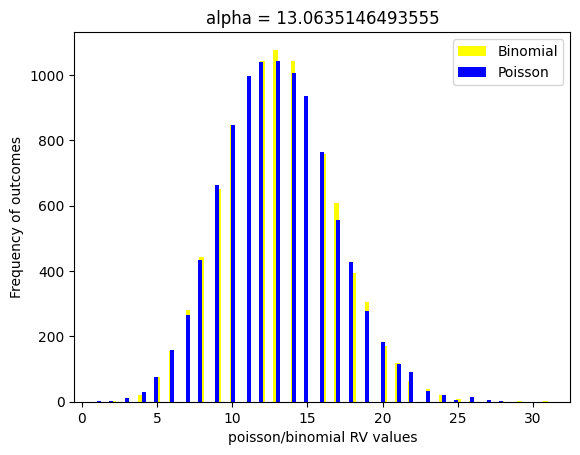

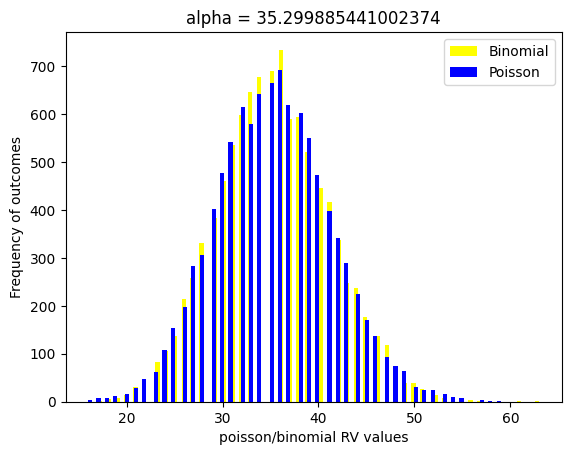

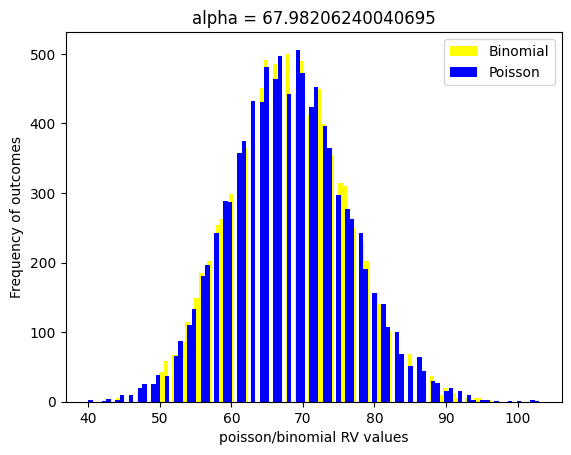

In [17]:
n=10000
for i in range(4):
    alpha=np.random.rand()*100
    v_binomial_p=alpha/n
    outcomeOfBinomialExps = aBinomialExperiment(np.random.default_rng(78918), n, v_binomial_p, numberOfBinomialExperiments = n, profitLoss_Bern=[1,0])
    outcomesOfPoissonExperiments = np.ndarray((1,n))
    outcomesOfPoissonExperiments = np.random.poisson(lam = alpha, size=outcomesOfPoissonExperiments.shape)
    plt.title("alpha = "+str(alpha))
    plt.hist(outcomeOfBinomialExps,bins=100,color='yellow',label='Binomial')
    plt.hist(outcomesOfPoissonExperiments[0],bins=100,color='blue',label='Poisson')
    plt.xlabel("poisson/binomial RV values")
    plt.ylabel("Frequency of outcomes")
    plt.legend()
    plt.show()

Q3 Illustrate the law of large numbers and the central limit theorem for a sum of iid Poisson RVs. Note that the provided code (Binomial.ipynb) does the same for a sum of Bernoulli $(p)$ RVs.

Do the above for two values of $\alpha$ chosen uniformly and randomly from $(1, 20)$. For each value of $\alpha$ demonstrate the above over an increasing, four long, sequence of number of RVs being added. For example, in the provided code, we simulated $5,10,100,1000$ Bernoulli RVs being summed. Note that you may need a sequence different from the example. Figure out a sequence that shows convergence to a bell shaped curve (central limit theorem) and clustering of the histogram around the mean (law of large numbers).

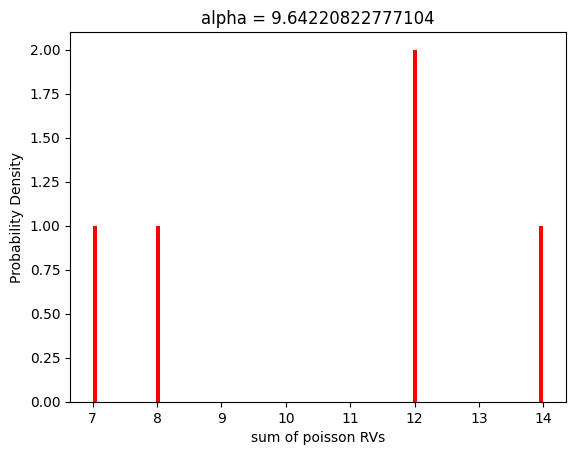

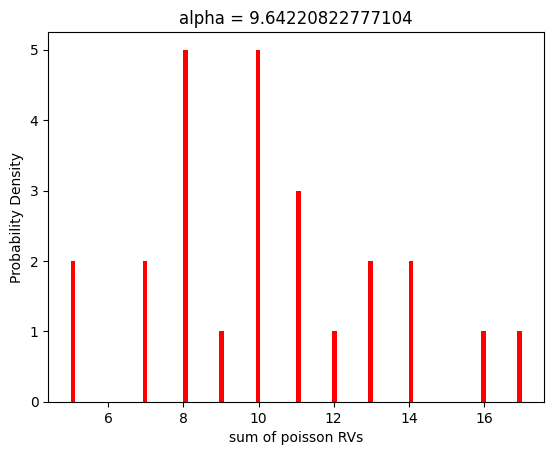

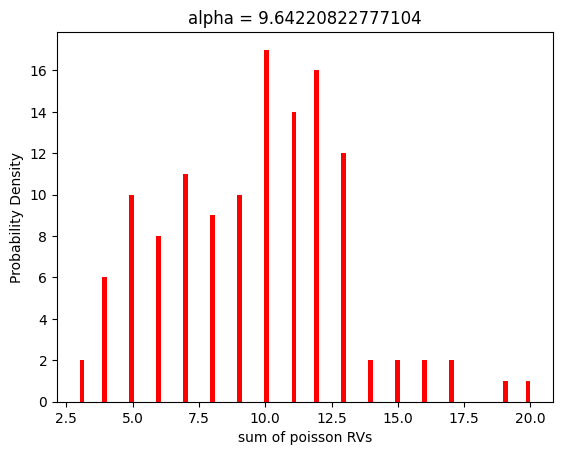

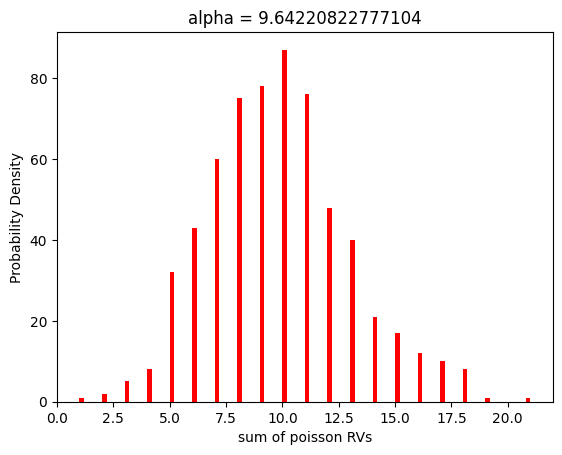

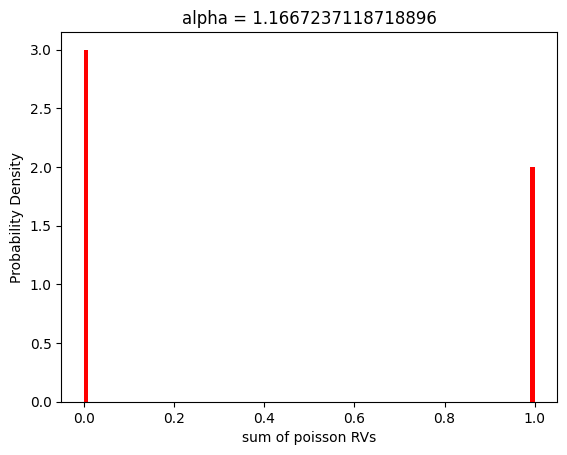

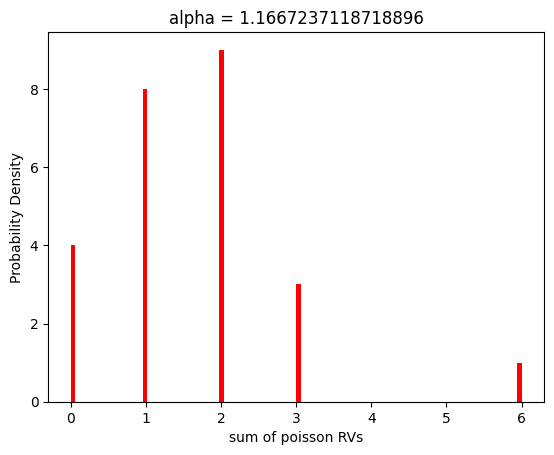

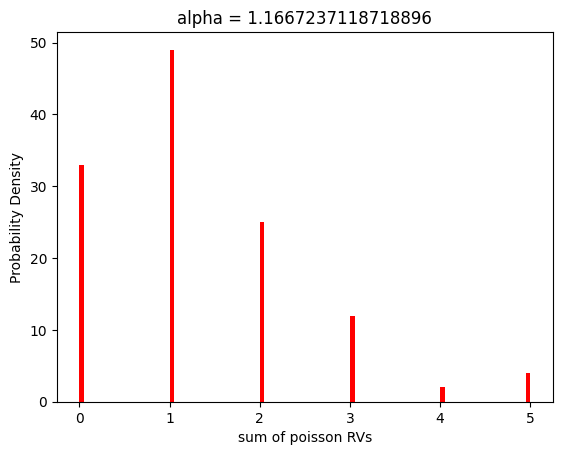

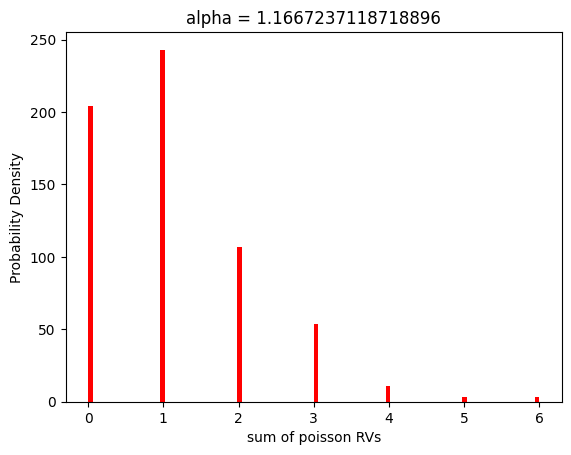

In [18]:
n=[5,25,125,625]
for j in range(2):
    alpha=np.random.rand()*(20-1) + 1
    for i in range(4):
        v_binomial_p=alpha/n[i]
        outcomesOfPoissonExperiments = np.ndarray((1,n[i]))
        outcomesOfPoissonExperiments = np.random.poisson(lam = alpha, size=outcomesOfPoissonExperiments.shape)
        sum_poissons = np.sum(outcomesOfPoissonExperiments)
        plt.title("alpha = "+str(alpha))
        plt.hist(outcomesOfPoissonExperiments[0],bins=100,color='red')
        plt.xlabel("sum of poisson RVs")
        plt.ylabel("Probability Density")
        plt.show()